# Catalogue Query Tools

This notebook provides examples on how to use the Catalogue Toolkit to build and explore a catalogue database:

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from openquake.cat.parsers.isf_catalogue_reader import ISFReader
import openquake.cat.catalogue_query_tools as cqt

## Constructing the Database

In [3]:
# Read in the catalogue
parser = ISFReader("outputs/1900-2021-PH_ISF_Catalogue.isf")
catalogue1 = parser.read_file("ISC", "ISC-ALL")
print("Catalogue contains: %d events" % catalogue1.get_number_events())

Catalogue contains: 110835 events


In [4]:
# Build the HDF5 Database
database_file = "outputs/iscrb-catalogue-1900-2023_db2.hdf5"
if os.path.exists(database_file):
    os.remove(database_file)
_ = catalogue1.build_dataframe(hdf5_file=database_file)

C:\Users\enrico.abcede\Desktop\catalogue\oq-mbtk-repo\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:914262)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\Desktop\catalogue\oq-mbtk-repo\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:914263)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\Desktop\catalogue\oq-mbtk-repo\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:16958127)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\Desktop\catalogue\oq-mbtk-repo\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:16958154)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\Desktop\catalogue\oq-mbtk-repo\oq-mbtk\openquake\cat\isf_catalogue.py:1212: UserWarning: Warning, depth <= 0.0 (id:914136)
  warnings.warn(fmt.format(eq.id))
C:\Users\enrico.abcede\Desktop\catalogue\oq-mbtk-repo\oq-mbtk\openquake\cat\isf_catalogue.p

## Using the Database

In [5]:
db1 = cqt.CatalogueDB(database_file)

### Apply Limiting Selections

#### By Bounding Box

In [6]:
lower_lon = 0
upper_lon = 180
lower_lat = 0
upper_lat = 180
bbox = [lower_lon, upper_lon, lower_lat, upper_lat]
selector = cqt.CatalogueSelector(db1)
aegean_cat = selector.select_within_bounding_box(bbox)

In [7]:
number_origins, number_magnitudes = aegean_cat._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

Number of Origins = 0, Number of Magnitudes = 0


#### By Polygon

In [ ]:
polygon = np.array([[15.0, 45.0],
                    [30.0, 45.0],
                    [30.0, 30.0],
                    [15.0, 30.0],
                    [15.0, 45.0]])
selector2 = cqt.CatalogueSelector(db1)
aegean_cat_alt = selector2.select_within_polygon(polygon[:, 0], polygon[:, 1])
number_origins, number_magnitudes = aegean_cat_alt._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

#### By Magnitude

In [ ]:
# Above magnitude 6.0
selector3 = cqt.CatalogueSelector(aegean_cat)
aegean_cat_m6 = selector3.select_within_magnitude_range(lower_mag=6.0, upper_mag=9.0)
number_origins, number_magnitudes = aegean_cat_m6._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

#### By Depth

In [ ]:
selector4 = cqt.CatalogueSelector(aegean_cat_alt)
aegean_cat_deep = selector4.select_within_depth_range(upper_depth=50.0, lower_depth=200.0)
number_origins, number_magnitudes = aegean_cat_deep._get_number_origins_magnitudes()
print("Number of Origins = %d, Number of Magnitudes = %d" % (number_origins,
                                                             number_magnitudes))

## Exploring the Catalogue Database

### See Summary of Agencies and Magnitudes in the Catalogue

In [8]:
agency_count = cqt.get_agency_magtype_statistics(db1)

Agency: ISC - 57276 Origins
mb (50053) | MS (10086)
Agency: IDC - 50238 Origins
mb (50235) | mbtmp (42280) | mb1 (35182) | mb1mx (35164) | MS (20385) | Ms1 (13683) | ms1mx (13664) | ML (11085)
Agency: MAN - 36122 Origins
MS (35047) | ML (30721) | mb (30249) | mL (684) | UK (5) | MB (1)
Agency: NEIC - 32468 Origins
mb (29044) | MSZ (1281) | MS (856) | MW (444) | Mww (444) | Mwb (194) | mw (169) | Ms_20 (156) | Mwr (115) | ME (114) | Mw (46) | Me (19) | Mwc (17) | ML (5) | mb_Lg (1)
Agency: TAP - 23876 Origins
ML (21869) | UK (1968) | md (183) | mL (117) | MS (6) | mb (2)
Agency: ISC-EHB - 16639 Origins
No magnitudes corresponding to this agency
Agency: EHB - 13484 Origins
No magnitudes corresponding to this agency
Agency: BJI - 13213 Origins
mb (11832) | mB (6574) | Ms (6447) | Ms7 (3049) | Msz (2443) | ML (2269) | MS (1436) | mL (803) | Mb (212) | Md (1)
Agency: JMA - 12410 Origins
UK (8936) | MV (2110) | MD (170) | MG (148) | MW (48)
Agency: DJA - 11716 Origins
MLv (9771) | mb (7910) 

### Search for a Specific Agency-Magnitude Combination

Search for body-wave magnitude common to 'BJI' and 'ISC'

In [9]:
query_NEIC_GCMT_mw, NEIC_GCMT_mw_cat = cqt.get_agency_magnitude_pairs(db1, ("NEIC", "Mw"), ("GCMT", "Mw"), no_case=True)

Agency-Pairs: (NEIC, Mw) & (GCMT, Mw) returned 530 events


In [11]:
query_NEIC_GCMT_cat

NameError: name 'query_NEIC_GCMT_cat' is not defined

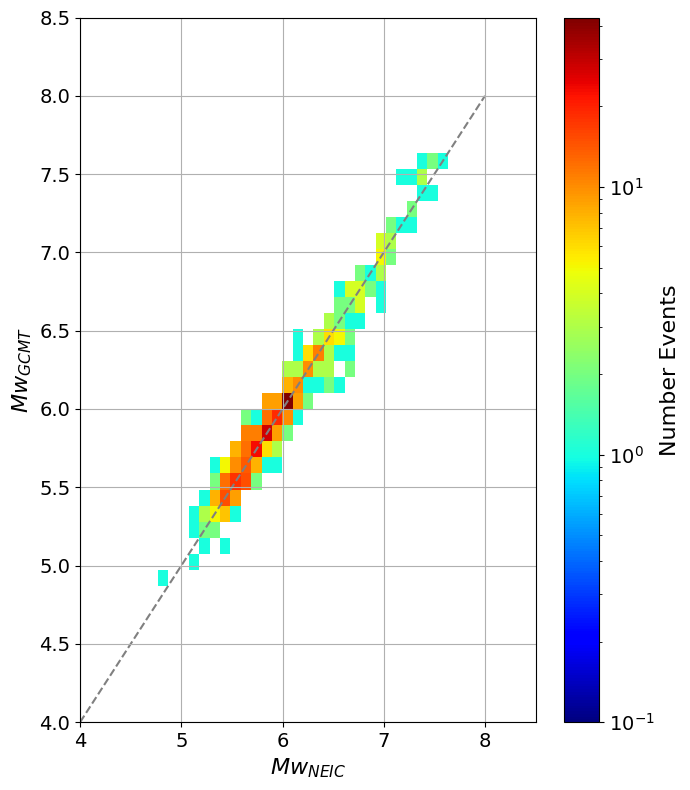

In [12]:
_ = cqt.plot_agency_magnitude_density(query_NEIC_GCMT_mw)

### Join Query Results

Join together the results of two queries. For example the Global CMT magnitudes are reported under either
'GCMT' or 'HRVD'. So search for both terms

In [15]:
query1, cat1 = cqt.get_agency_magnitude_pairs(db1, ("GCMT", "Mw"), ("NEIC", "Mw"), no_case=True)
query2, cat2 = cqt.get_agency_magnitude_pairs(db1, ("GCMT", "Mw"), ("NEIS", "Ms"), no_case=True)
query_niec_gcmt_ms = cqt.join_query_results(query1, query2)

Agency-Pairs: (GCMT, Mw) & (NEIC, Mw) returned 646 events
Agency-Pairs: (GCMT, Mw) & (NEIS, Ms) returned 83 events


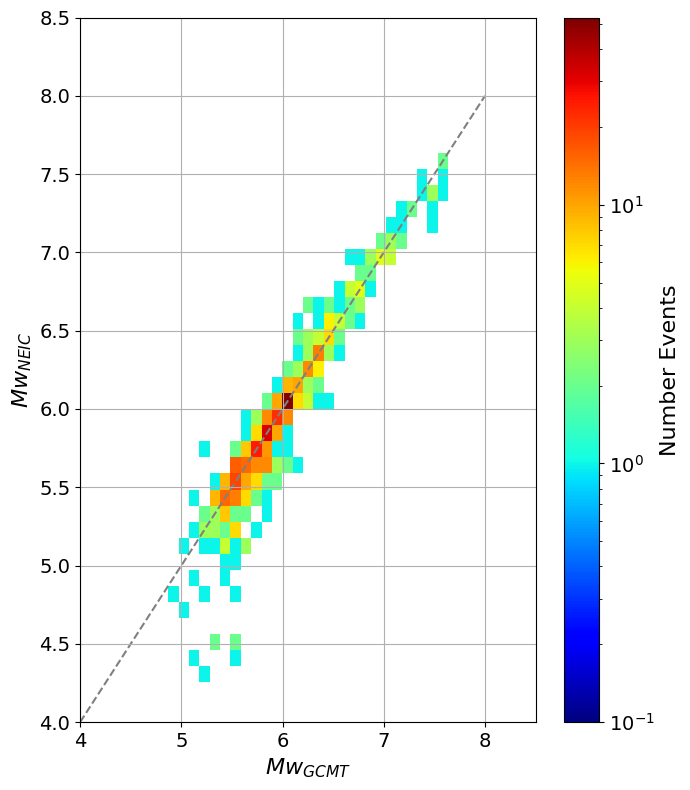

In [16]:
_ = cqt.plot_agency_magnitude_density(query_niec_gcmt_ms)

## Regression Tools

In this example we compare the $M_S$ scale as recorded by the BJI network with the $M_W$ scale reported by
HRVD/GCMT (from the previous query)

#### Set up the regression

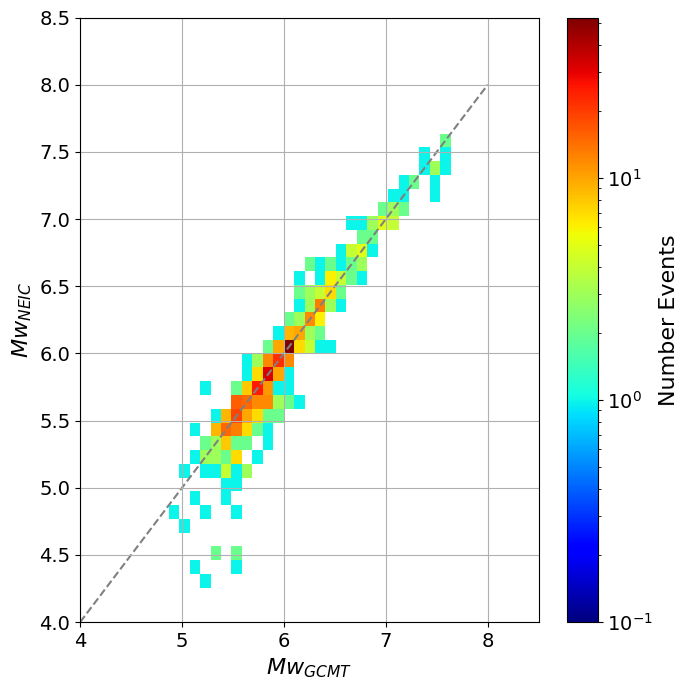

In [17]:
regressor = cqt.CatalogueRegressor(query_niec_gcmt_ms)
regressor.plot_density(overlay=False)

#### Apply a Linear Model 

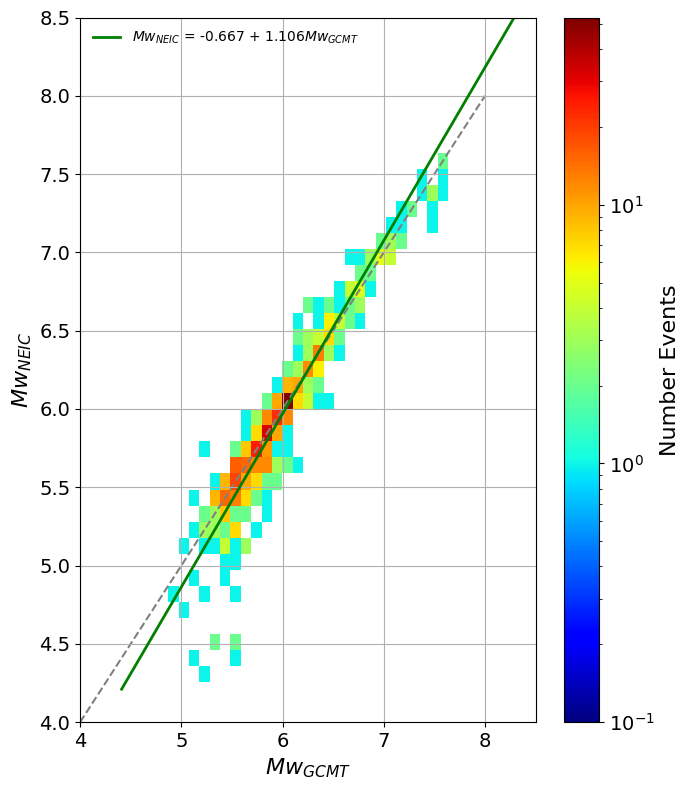

Mw = -0.667 + 1.106 MS +/- 0.173


In [18]:
linear_model = regressor.run_regression("polynomial", # Model Type
                                        [0., 1.]) # Initial guess of parameters
regressor.plot_model_density(False, 0)
# View Results
print("Mw = %.3f + %.3f MS +/- %.3f" % (regressor.results.beta[0],
                                        regressor.results.beta[1],
                                        regressor.standard_deviation))

#### Overlay another model defined as a Magnitude Conversion Rule

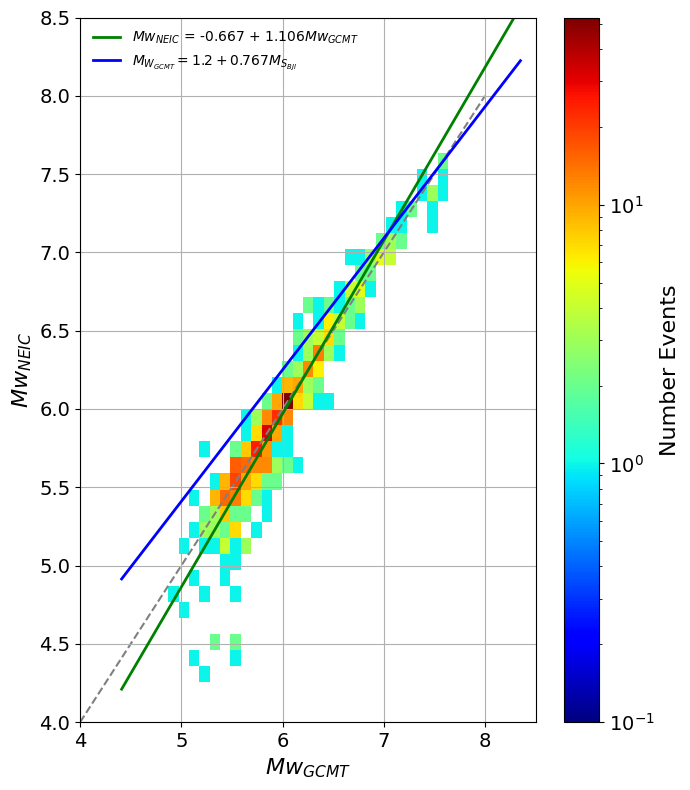

In [19]:
from openquake.cat.isc_homogenisor import MagnitudeConversionRule
# Define empirical model
def RandomRule1(magnitude):
    return 1.21 + 0.84 * magnitude

def RandomRuleSigma(magnitude):
    return 0.2
# Create Rule
rule1 = MagnitudeConversionRule("BJI", "MS", RandomRule1, RandomRuleSigma,
                                model_name=r"$M_{W_{GCMT}} = 1.2 + 0.767 M_{S_{BJI}}$")
# Plot the model - with overla set to true
regressor.plot_model_density(True, 0)
# Overlay the rule and close the figure (overlay set to False)
regressor.plot_magnitude_conversion_model(rule1, False, line_color="b")

### Apply a Piecewise Linear Model

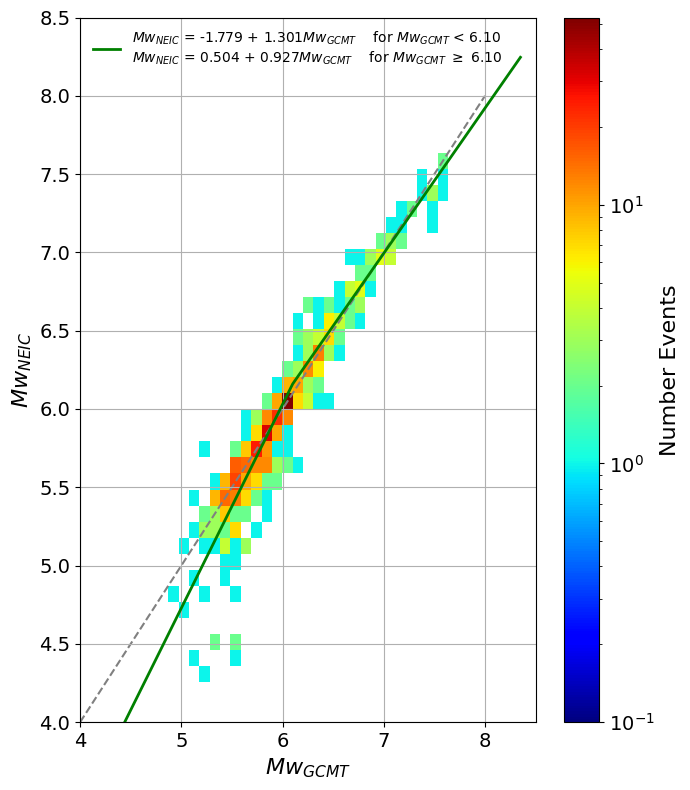

Standard Deviation - Segment 1: 0.186, Segment 2: 0.138


In [20]:
initial_guess = [1.0, 1.0, 0.0]  # [slope 1, slope 2, intercept]

linear_model = regressor.run_regression("2segmentM6.1", # Model Type
                                        initial_guess) # Initial guess of parameters
regressor.plot_model_density(False, 0)
print("Standard Deviation - Segment 1: %.3f, Segment 2: %.3f" % (regressor.standard_deviation[0],
                                                                 regressor.standard_deviation[1]))